<a href="https://colab.research.google.com/github/nebuus/ITER/blob/dev/Permeation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Installs necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.optimize as opt

In [37]:
# Mounts google drive to retrieve files from there if applicable
#from google.colab import drive
#drive.mount('/content/gdrive')
#/content/gdrive/MyDrive/Colab Notebooks/2023-9-5__9h-33m-26s[4ccb7fa9].txt
#/content/gdrive/MyDrive/Colab Notebooks/2023-9-5__9h-33m-29s[82047c9c].txt

In [38]:
# Defines values for TEM1 approximation
#t0 = 20
#F = 4
#N1 = 200
#k1 = 1000
#N2 = 13000
#k2 = 9000
#N3 = 10000
#k3 = 1000

In [39]:
# Defines functions for TEM1 approximation
#def N(t):
#  if t <= t0:
#    return F
#  else:
#    return ((N1*np.exp(-k1/(t-t0))+N2*np.exp(-k2/(t-t0))+N3*np.exp(-k3/(t-t0)))/np.sqrt(t-t0))+F



In [40]:
# Imports TEM2 datus
TEM2 = pd.read_csv('/content/2023-9-5__9h-33m-26s[4ccb7fa9].txt', delim_whitespace=True)
TEM2.head()

,No,Total_sec,PCdate,PCtime,Akoinz_cps,Koinz_cps,Gas1_V,Gas2_V,Gas1_Lh,Gas2_Lh,Temp_C,RH_%,rec
0,0,0,05.09.2023,09:38:22,1,0.5,4.09,2.76,30.8,10.00,24.2,59.8,NaN
1,1,10,05.09.2023,09:38:32,2,1.0,4.08,2.77,30.8,10.11,21.4,69.1,NaN
2,2,20,05.09.2023,09:38:42,2,0.4,4.08,2.75,30.7,9.85,21.4,69.2,NaN
3,3,30,05.09.2023,09:38:52,2,0.3,4.08,2.75,30.8,9.94,21.4,69.1,NaN
4,4,40,05.09.2023,09:39:02,2,0.4,4.08,2.76,30.8,10.00,21.4,69.1,NaN


In [41]:
# Imports TEM1 datus
TEM1 = pd.read_csv('/content/2023-9-5__9h-33m-29s[82047c9c].txt', delim_whitespace=True)
TEM1.head()

,No,Total_sec,PCdate,PCtime,Akoinz_cps,Koinz_cps,Gas1_V,Gas2_V,Gas1_Lh,Gas2_Lh,Temp_C,RH_%,rec
0,0,0,05.09.2023,09:38:22,5,0.5,4.09,2.78,30.9,10.34,24.2,60.3,NaN
1,1,10,05.09.2023,09:38:32,5,0.5,4.10,2.69,31.0,9.00,21.5,74.3,NaN
2,2,20,05.09.2023,09:38:42,5,0.7,4.09,2.81,30.8,10.72,21.5,74.2,NaN
3,3,30,05.09.2023,09:38:52,5,0.6,4.09,2.81,30.9,10.68,21.4,74.4,NaN
4,4,40,05.09.2023,09:39:02,6,0.5,4.10,2.72,31.0,9.42,21.5,74.3,NaN


(0.0, 200.0)

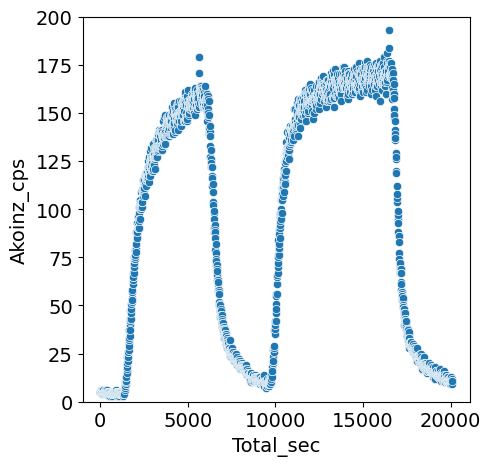

In [42]:
# Draws a graph for TEM1
plt.figure(figsize=(5,5))
sns.scatterplot(x=TEM1['Total_sec'],y=TEM1['Akoinz_cps'])
plt.ylim(0, 200)

(0.0, 20.0)

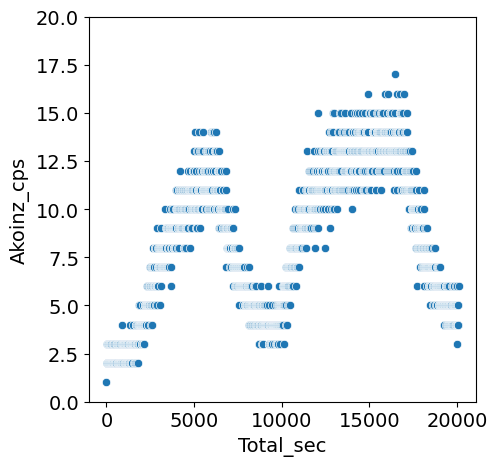

In [43]:
# Draws a graph for TEM2
plt.figure(figsize=(5,5))
sns.scatterplot(x=TEM2['Total_sec'],y=TEM2['Akoinz_cps'])
plt.ylim(0, 20)

In [44]:
# Creates a data frame with only the lines where tritium supply has been initialized or finalized
onoff1 = TEM1[~TEM1['rec'].isna()]
#print(onoff1)
# Creates a dataframe with only the line numbers of on/off values
onofftimesTEM1 = onoff1["No"]
onofftimesTEM1

97        97
562      562
933      933
1644    1644
Name: No, dtype: int64

In [45]:
# Creates a data frame with only the lines where tritium supply has been initialized or finalized
onoff2 = TEM2[~TEM2['rec'].isna()]
#print(onoff2)
# Creates a dataframe with only the line numbers of on/off values
onofftimesTEM2 = onoff2["No"]
onofftimesTEM2

97        97
562      562
933      933
1644    1644
Name: No, dtype: int64

In [46]:
# Cuts input data into segment from HTO supplied-shut off and the other way around, only keeps cps values
# Since time is recorded at the previous datapoint before HTO shut-off,
# Varbut salikt TEM1 un TEM2 viena df lai vieglak
TEM1_1up = TEM1.iloc[onofftimesTEM1.iloc[0]+1:onofftimesTEM1.iloc[1]+1][['Akoinz_cps',"Total_sec"]]
TEM1_1up["t"] = TEM1_1up['Total_sec'] - TEM1_1up['Total_sec'].min()+1

TEM1_1down = TEM1.iloc[onofftimesTEM1.iloc[1]+1:onofftimesTEM1.iloc[2]+1][['Akoinz_cps',"Total_sec"]]
TEM1_1down["t"] = TEM1_1down['Total_sec'] - TEM1_1down['Total_sec'].min()+1

TEM1_2up = TEM1.iloc[onofftimesTEM1.iloc[2]+1:onofftimesTEM1.iloc[3]+1][['Akoinz_cps',"Total_sec"]]
TEM1_2up["t"] = TEM1_2up['Total_sec'] - TEM1_2up['Total_sec'].min()

TEM1_2down = TEM1.iloc[onofftimesTEM1.iloc[3]+1:][['Akoinz_cps',"Total_sec"]]
TEM1_2down["t"] = TEM1_2down['Total_sec'] - TEM1_2down['Total_sec'].min()

In [47]:
# Cuts input data into segment from HTO supplied-shut off and the other way around, only keeps cps values
TEM2_1up = TEM2.iloc[onofftimesTEM2.iloc[0]+1:onofftimesTEM2.iloc[1]+1][['Akoinz_cps',"Total_sec"]]
TEM2_1up["t"] = TEM2_1up['Total_sec'] - TEM2_1up['Total_sec'].min()

TEM2_1down = TEM2.iloc[onofftimesTEM2.iloc[1]+1:onofftimesTEM2.iloc[2]+1][['Akoinz_cps',"Total_sec"]]
TEM2_1down["t"] = TEM2_1down['Total_sec'] - TEM2_1down['Total_sec'].min()

TEM2_2up = TEM2.iloc[onofftimesTEM2.iloc[2]+1:onofftimesTEM2.iloc[3]+1][['Akoinz_cps',"Total_sec"]]
TEM2_2up["t"] = TEM2_2up['Total_sec'] - TEM2_2up['Total_sec'].min()

TEM2_2down = TEM2.iloc[onofftimesTEM2.iloc[3]+1:][['Akoinz_cps',"Total_sec"]]
TEM2_2down["t"] = TEM2_2down['Total_sec'] - TEM2_2down['Total_sec'].min()

<Axes: ylabel='Akoinz_cps'>

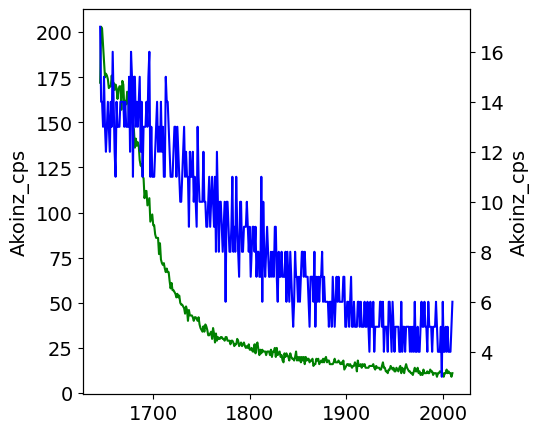

In [48]:
# Plot to check if everything is ok
plt.figure(figsize=(5,5))
sns.lineplot(data=TEM1_2down.Akoinz_cps, color="g")
ax2 = plt.twinx()
sns.lineplot(data=TEM2_2down.Akoinz_cps, color="b", ax=ax2)

In [49]:
# define the true objective function
def M(t, t0, F, N1, k1, N2, k2, N3, k3):
    result = ((N1*np.exp(-k1/(t-t0))+N2*np.exp(-k2/(t-t0))+N3*np.exp(-k3/(t-t0)))/np.sqrt(t-t0))+F
    result[t <= t0] = F  # Set values where x is less than or equal to 0 to bkg to avoid /0 error
    return result

xdata = TEM1_1up['t']
ydata = TEM1_1up['Akoinz_cps']

#random initial values (but close to realistic)
p0 = np.array([20, 6, 200, 1000, 13000, 9000, 10000, 1000])

# Fit the function to the data
popt, pcov = curve_fit(f=M, xdata=xdata, ydata=ydata, p0=p0, maxfev=32000, sigma=ydata**0.5)
popt

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 1.28818038e+02,  4.18744601e+00, -2.18370044e+05,  4.25893466e+03,
        2.20908713e+05,  4.48474601e+03,  2.02639340e+04,  1.83549138e+03])

<Axes: xlabel='t', ylabel='Akoinz_cps'>

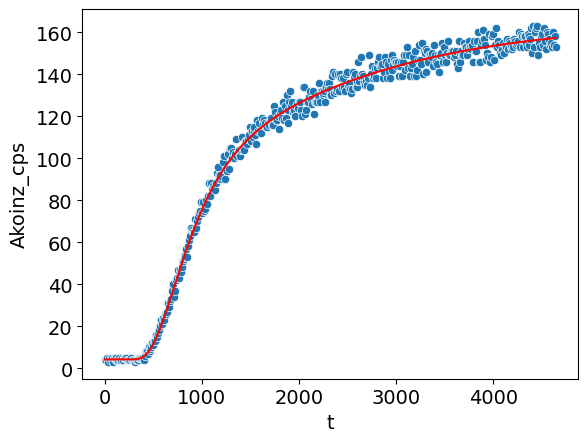

In [50]:
# Creates a column with N values based on optimization outputs and plots it
TEM1_1up['N'] = M(xdata, *popt)
sns.scatterplot(x=xdata, y=TEM1_1up['Akoinz_cps'])
sns.lineplot(x=xdata, y=TEM1_1up['N'], color="red")

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


[ 3.65345756e+02  1.58031177e+02 -4.34532676e+06  3.90384405e+09
 -1.34603554e+04  7.31977749e+03 -9.34733568e+03  9.26295451e+02]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<Axes: xlabel='t', ylabel='Akoinz_cps'>

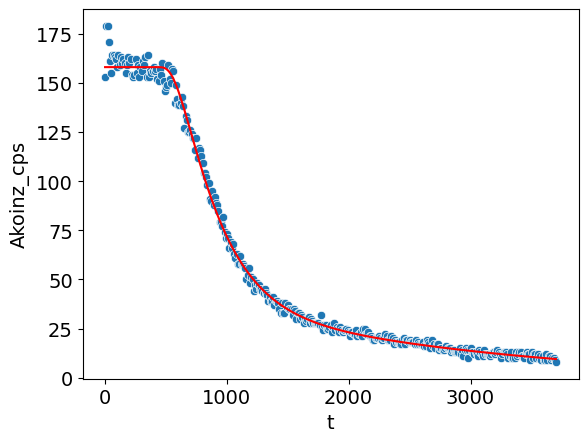

In [51]:
xdata1 = TEM1_1down['t']
ydata1 = TEM1_1down['Akoinz_cps']

#random initial values (but close to realistic)
p01 = np.array([20, 400, 5, 35000, -1300000, 30000, -14000, 1500])

# Fit the function to the data
popt1, pcov1 = curve_fit(f=M, xdata=xdata1, ydata=ydata1, p0=p01, maxfev=42000, sigma=ydata1**0.5)
print(f'{popt1}')
TEM1_1down['N'] = M(xdata1, *popt1)
sns.scatterplot(x=xdata1, y=TEM1_1down['Akoinz_cps'])
sns.lineplot(x=xdata1, y=TEM1_1down['N'], color="red")

In [52]:
#If fit is bad due to massive outliers, then i manually replace a few data points with the mean
#TEM1_1down['Akoinz_cps'].iloc[TEM1_1down['Akoinz_cps'] > 170] = 165
#TEM1_1down['Akoinz_cps']

0.49501339980684733


<Axes: xlabel='t', ylabel='Norm'>

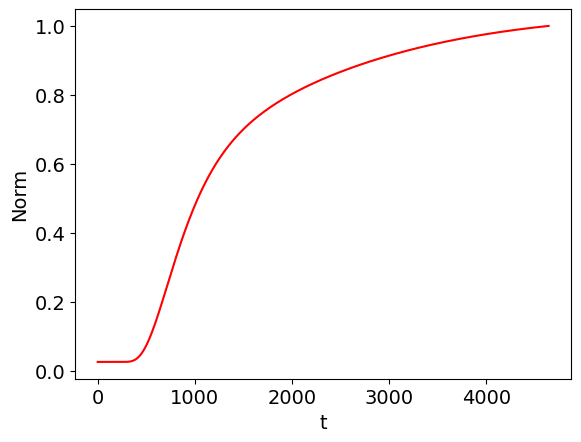

In [53]:
# outputs sum of residuals which evaluates the fit
Sn1 = np.sqrt(2*np.sum(delta(TEM1_1up['N'],TEM1_1up['Akoinz_cps']))/93)
print(Sn1)
# Normalizes N values to be in range from 0 to 1
TEM1_1up['Norm'] = TEM1_1up['N']/np.max(TEM1_1up['N'])
sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['Norm'], color="red")

0.5041330216038855


<Axes: xlabel='t', ylabel='Norm'>

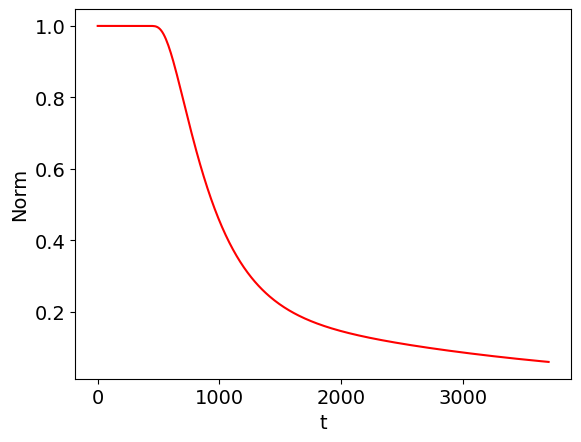

In [54]:
# outputs sum of residuals which evaluates the fit
Sn2 = np.sqrt(2*np.sum(delta(TEM1_1down['N'],TEM1_1down['Akoinz_cps']))/93)
print(Sn2)
# Normalizes N values to be in range from 0 to 1
TEM1_1down['Norm'] = TEM1_1down['N']/np.max(TEM1_1down['N'])
sns.lineplot(x=TEM1_1down['t'], y=TEM1_1down['Norm'], color="red")

In [68]:
# Guess of initial values D, backgr2, jinf (in this order)
diff_guess = np.array([0.003, 2, 20])

def objective_function(diff_guess):
  D = diff_guess[0]  # Use the first element of diff_guess as D
  l = 3  # Use the third element of diff_guess as l
  bck2 = diff_guess[1]  # Use the second element of diff_guess as bck2
  jinf = diff_guess[2]

# Flow approximation using diffusion equation derived at our boundry conditions
  result = []
  for t in TEM1_1up['t']:
    j = 0
    for n in range(0,100):
      j += (np.exp(-((n+0.5)**2)*(l**2)/((D*t))))
    result.append(j)

  TEM1_1up['j'] = result*((jinf*2*l)/np.sqrt(np.pi*D*TEM1_1up['t']))+bck2
  TEM1_1up['Difference'] = TEM1_1up['j'].diff().fillna(0)

  b = np.array(TEM1_1up['Difference'])
  b_flipped = np.flip(b)

  TEM1_1up['Difference_flipped'] = b_flipped

  conv = np.convolve(TEM1_1up['Norm'], TEM1_1up['Difference_flipped'], mode='same')
  TEM1_1up['Conv'] = conv + bck2

  def delta(a, b):
      SiD = (np.sqrt(a) - np.sqrt(b))
      return SiD ** 2

  F = np.sum(delta(TEM1_1up['Conv'], TEM2_1up['Akoinz_cps']))

  return F

#sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['j'], color="red")
#TEM1_1up

optimized_result = opt.minimize(objective_function, diff_guess)

<ipython-input-68-d49195d60434>:15: RuntimeWarning: overflow encountered in exp
  j += (np.exp(-((n+0.5)**2)*(l**2)/((D*t))))
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
optimized_diff_guess = optimized_result.x
print("Optimized diff_guess:", optimized_diff_guess)

Optimized diff_guess: [9.41366606e-04 2.08435363e+00 1.01622436e+01]


In [56]:
#def delta(a,b):
#  SiD = (np.sqrt(a)-np.sqrt(b))
#  return SiD**2
#
#F = np.sum(delta(TEM1_1up['Conv'], TEM2_1up['Akoinz_cps']))
#
#x = opt.minimize(F, diff_guess).x
#x

In [57]:
# Random input values for diffusion down (close to real)
#D1=0.003
#l1=3
#bck21=4
#jinf1 = 8

# Flow approximation using diffusion equation derived at our boundry conditions
#result2 = []
#for t in TEM1_1down['t']:
#  j = 0
#  for n in range(0,100):
#    j += (np.exp(-((n+0.5)**2)*(l**2)/((D*t))))
#  result2.append(j)

#result2

#TEM1_1down['j'] = result2*((jinf1*2*l)/np.sqrt(np.pi*D*TEM1_1down['t']))+bck21
#sns.lineplot(x=TEM1_1down['t'], y=TEM1_1down['j'], color="red")
#TEM1_1down


<Axes: xlabel='t', ylabel='Conv'>

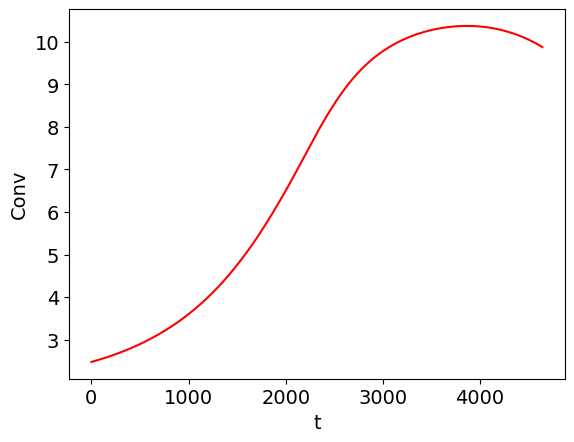

In [67]:
TEM1_1up['Difference'] = TEM1_1up['j'].diff().fillna(0)

b = np.array(TEM1_1up['Difference'])
b_flipped = np.flip(b)

TEM1_1up['Difference_flipped']= b_flipped

conv = np.convolve(TEM1_1up['Norm'], TEM1_1up['Difference_flipped'],  mode='same')
TEM1_1up['Conv'] = conv + bck2
sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['Conv'], color="red")

<Axes: xlabel='t', ylabel='Conv'>

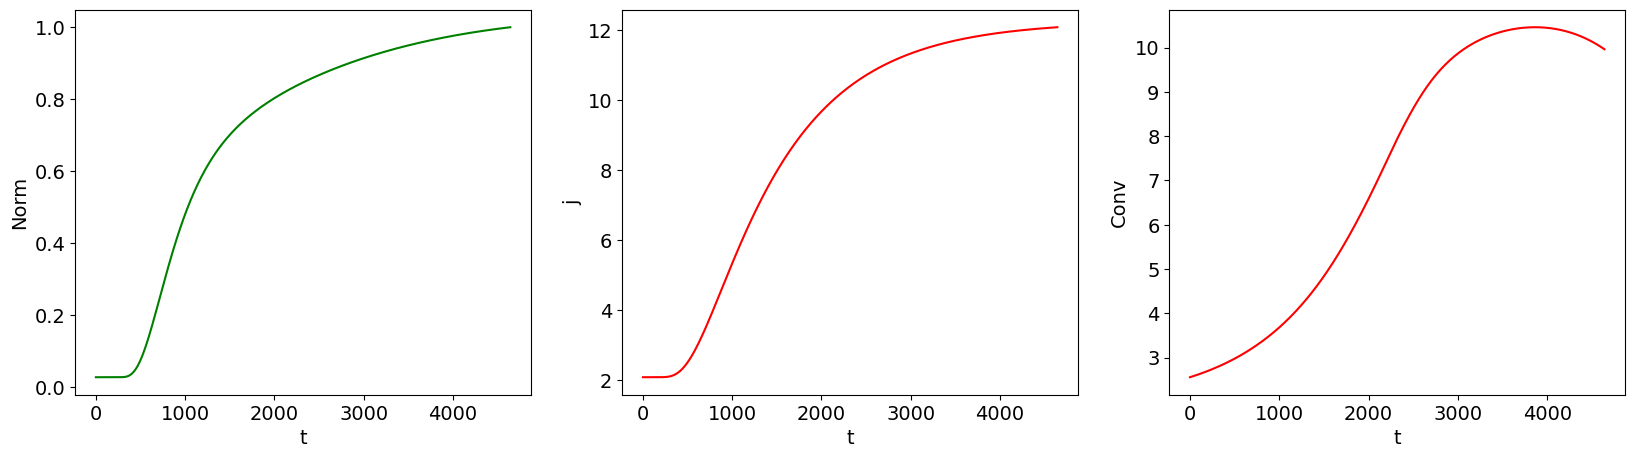

In [69]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['Norm'], color="green", ax=axs[0])
sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['j'], color="red", ax=axs[1])
sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['Conv'], color="red", ax=axs[2])
#sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['ConvDiff'], color="blue", ax=axs[4])

<Axes: xlabel='t', ylabel='j'>

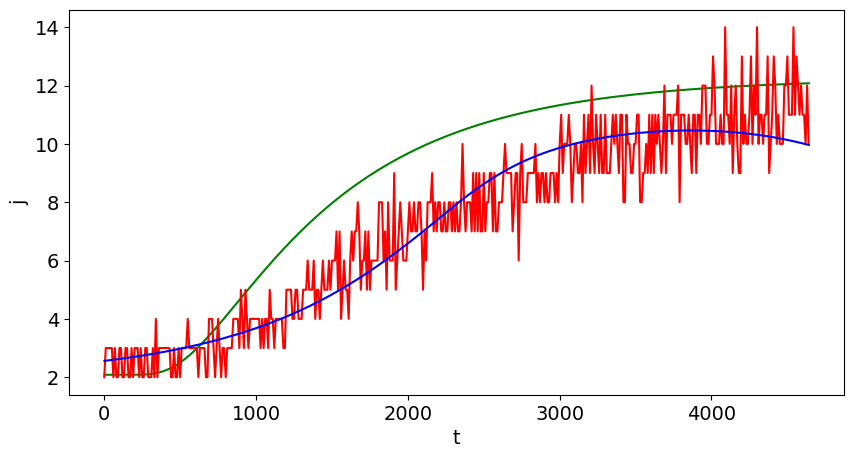

In [70]:
fig, axs = plt.subplots(ncols=1, figsize=(10,5))
sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['j'], color="green")
sns.lineplot(x=TEM2_1up['t'], y=TEM2_1up['Akoinz_cps'], color="red")
sns.lineplot(x=TEM1_1up['t'], y=TEM1_1up['Conv'], color="blue")